In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib 
import seaborn as sns 
from matplotlib.colors import ListedColormap 
import matplotlib.patches as mpatches

In [4]:
from scipy.stats import normaltest, test 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler 
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error, accuracy_score, f1_score 
from sklearn.metrics import mean_squared_log_error 
from sklearn.metrics import classification_report, confusion_matrix 
from scipy.special import boxcox, inv_boxcox


In [5]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV 
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV, StratifiedKFold, cross_val_predict, KFold 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.svm import SVC 
from sklearn.metrics import roc_curve, auc 
from sklearn.decomposition import PCA 
from scipy.stats import zscore 
from itertools import combinations 
from sklearn.ensemble import IsolationForest 
from sklearn.cluster import KMeans 

In [10]:
#loading the data set
df = pd.DataFrame
import csv

In [ ]:
data_df = pd.read_csv("METABRIC_RNA_Mutation.csv")
data_df

In [ ]:
print(f"There are {data_df.shape[0]} rows and {data_df.shape[1]} columns")

In [ ]:
# Review the first 5 rows of the data 
data_df.head(5)

In [ ]:
# Checking the unique values in each column
data_nunique = data_df.nunique()
df_unique = pd.DataFrame({"Attribute": data_nunique.index , "Unique_value": data_nunique.values})
df_unique

In [ ]:
# The missing value and finding missing value of each columns 
total = data_df.isnull().sum().sort_values(ascending  = False)
percent = round((data_df.isnull().sum())/(data_df.isnull().count()),2)*100
null_value = pd.concat([total, percent], axis = 1, keys = ['null_values', 'null_value_percentage'])
null_value.head(15)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15, 8))

# Use clinical_df.isnull() to create a Boolean mask for missing values
sns.heatmap(clinical_df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [ ]:
clinical_df.describe().transpose().head()


In [ ]:
data_attribute_drop = data_df.columns[31:]
data_attribute = data_df.drop(data_attribute_drop, axis = 1)
data_attribute

In [ ]:
data_attribute.info()

In [ ]:
data_df.select_dtypes(include = np.number)

In [26]:
def standard_scaler(df):
    attribute = df.columns.tolist 

/var/folders/gj/7ksb4gv53ml_ryr5sn4vfm1w0000gn/T/ipykernel_67203/3429274094.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize = 12, rotation = 60)


Text(0.5, 1.0, 'The Distribution of Clinical Attributes')

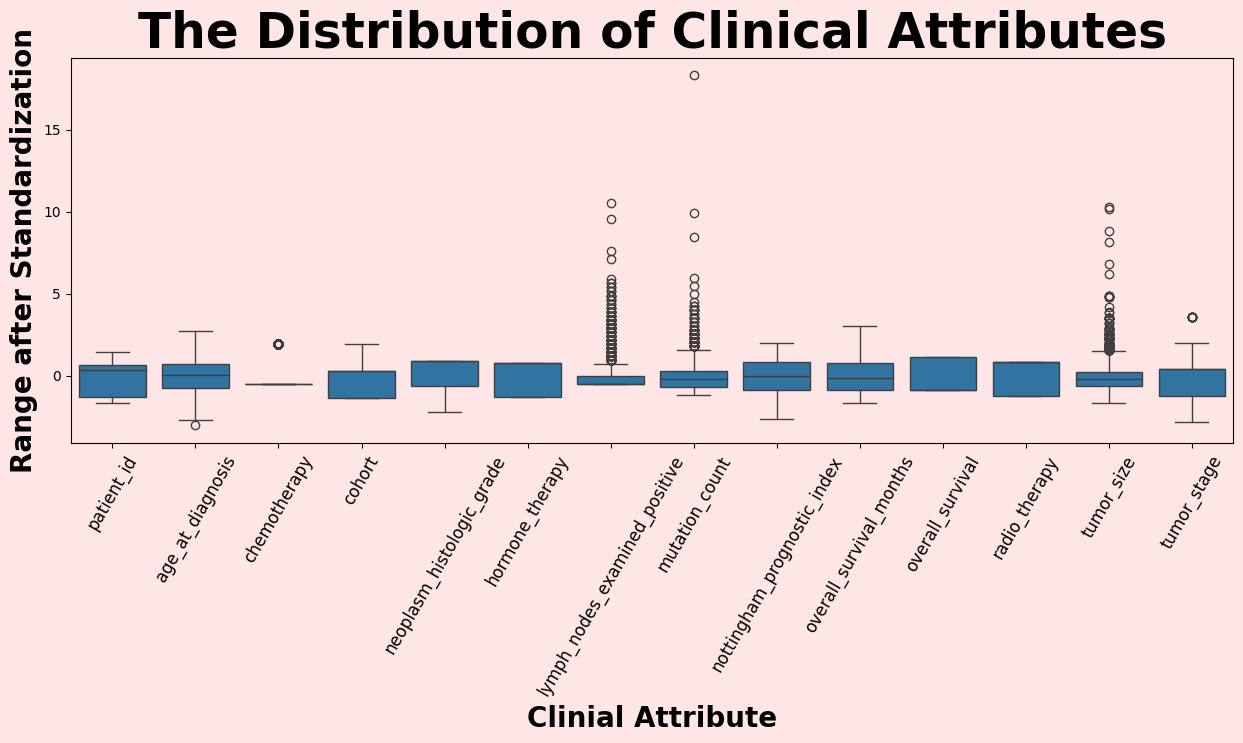

In [27]:
# Dropping the variable are object dtypes 
attribute_num = data_attribute[data_attribute.select_dtypes(include = 'number').columns.to_list()]

# Transforming the clinical attributes into the standard form after dropping the objective attributes
ss = StandardScaler()
attribute_nums = ss.fit_transform(attribute_num)
attribute_df = pd.DataFrame(attribute_nums, index = attribute_num.index, columns = attribute_num.columns)
attribute_df = pd.melt(attribute_df)

# Visualizing these attributes
fig, ax = plt.subplots(1,1, figsize = (15,5))
sns.boxplot(x = 'variable', y = 'value', data = attribute_df)
plt.xlabel('Clinial Attribute', fontsize = 20, fontweight = 'bold')
plt.ylabel("Range after Standardization", fontsize = 20, fontweight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 12, rotation = 60)

background_color = '#ffe6e6'
fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color)
plt.title('The Distribution of Clinical Attributes', fontsize = 35, fontweight = 'bold')

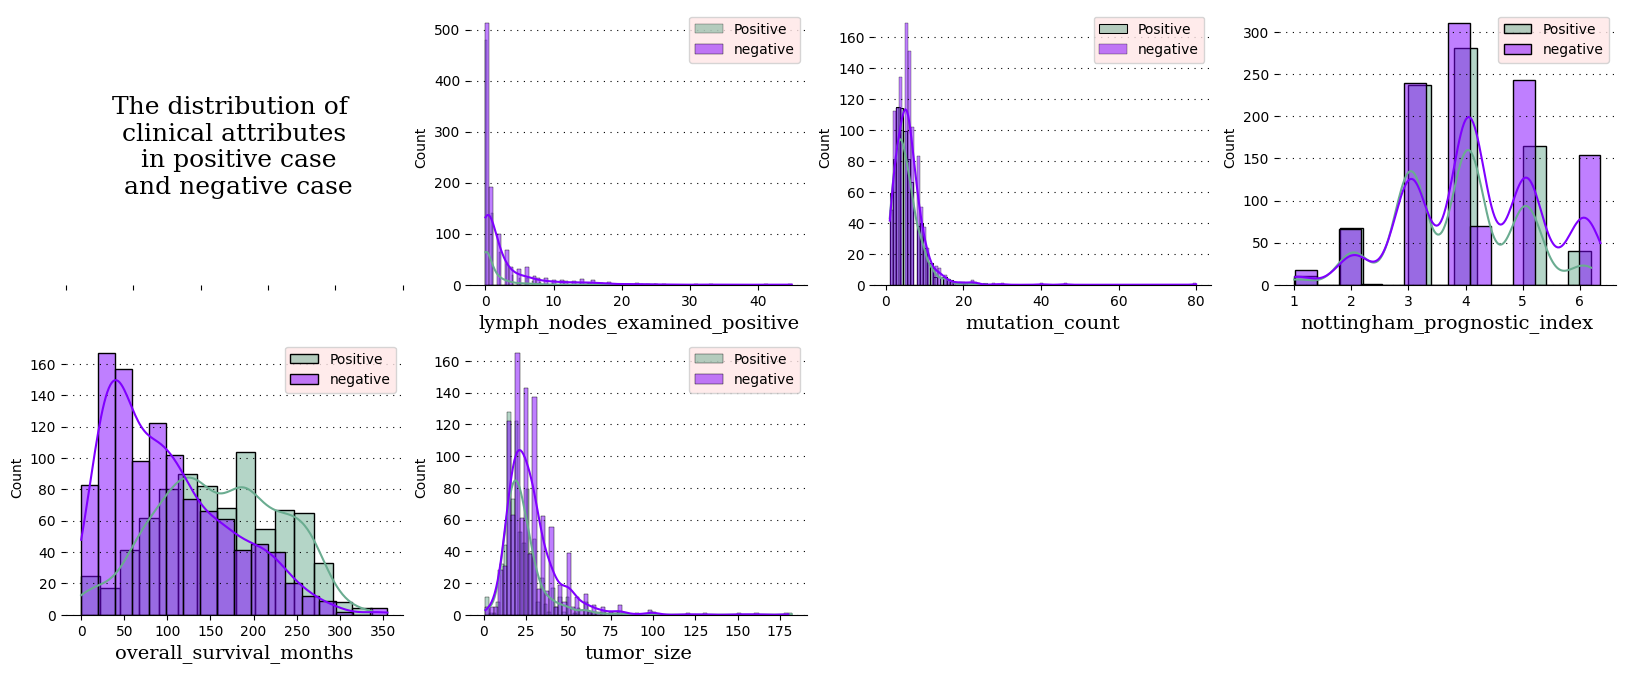

In [43]:
# The distribution of numerical clinical attributes first 
fig = plt.figure(figsize = (20, 25))
background_color = "#FFFFFF"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color)
columns = ['age_at_diagnosis', 'lymph_nodes_examined_positive', 'mutation_count', 'nottingham_prognostic_index', 'overall_survival_months', 'tumor_size']

for index, column in enumerate(columns):
    ax = plt.subplot(6, 4, index + 1)
    if index == 0:
        ax.text(0.5, 0.5, "The distribution of \nclinical attributes\n in positive case\n and negative case",
               horizontalalignment = 'center',
               verticalalignment= 'center', 
               fontsize = 18, fontfamily = 'serif', color = '#000000')
        ax.set_facecolor(background_color)
        ax.spines['bottom'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.tick_params(left = False, right = False )
        continue
    sns.histplot(x= data_attribute[data_attribute['overall_survival'] == 1][column], kde = True, color=color_palette[2], label='Positive')
    sns.histplot(x = data_attribute[data_attribute['overall_survival'] == 0][column], kde = True, color=color_palette[1], label = 'negative')
    
    ax.legend()
    
    ax.set_xlabel(column, fontsize = 14, fontfamily = 'serif', color = '#000000')
    ax.set_facecolor(background_color)
    ax.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

    for s in ['top','right', 'left']:
        ax.spines[s].set_visible(False)

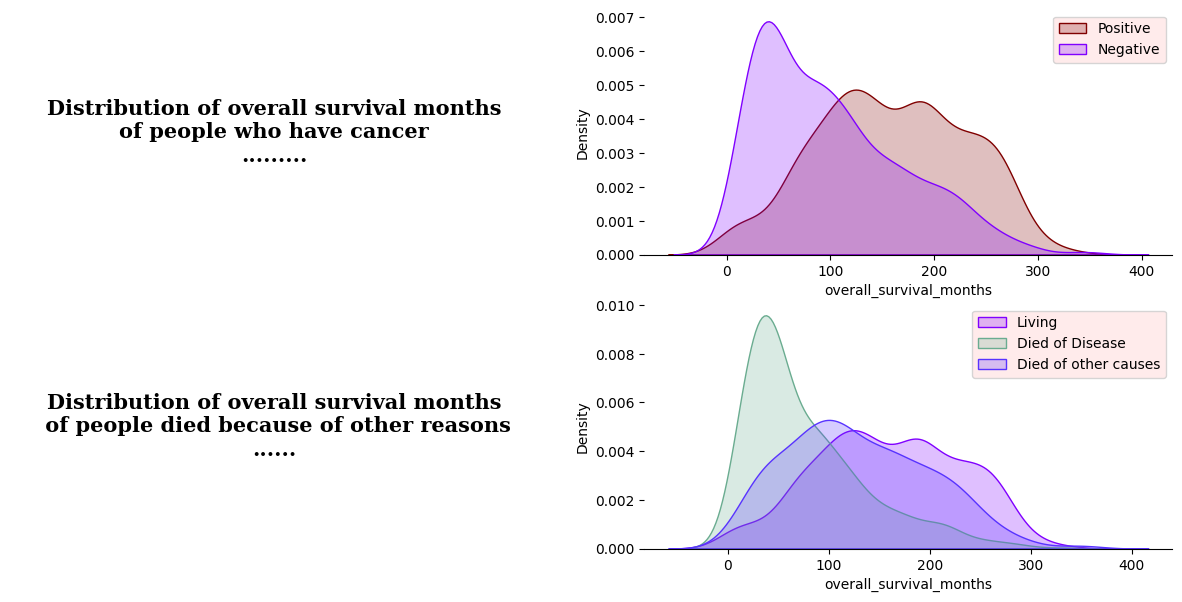

In [47]:
fig, ax = plt.subplots(2,2, figsize = (15,7))
background_color = "#FFFFFF"
color_palette = ["#800000", "#8000ff", "#6aac90", "#5833ff", "#da8829"]
fig.patch.set_facecolor(background_color)

title = ['Distribution of overall survival months\nof people who have cancer\n.........',
        'Distribution of overall survival months\n of people died because of other reasons\n......']
for i, til in enumerate(title):
    ax[i,0].text(0.5,0.5, til, 
                horizontalalignment = 'center',
                verticalalignment = 'center',
                fontsize = 15,
                fontweight = 'bold',
                fontfamily = 'serif', 
                color = '#000000')
    ax[i,0].spines['bottom'].set_visible(False)
    ax[i,0].set_xticklabels([])
    ax[i,0].set_yticklabels([])
    ax[i,0].tick_params(left = False, bottom = False)
    ax[i,0].set_facecolor(background_color)
    ax[i,0].grid(False)


sns.kdeplot(data_attribute[data_attribute['overall_survival'] == 1]['overall_survival_months'] ,ax = ax[0,1], fill = True, label = 'Positive', color = color_palette[0])
sns.kdeplot(data_attribute[data_attribute['overall_survival'] == 0]['overall_survival_months'] ,ax = ax[0,1], fill = True, label = 'Negative', color = color_palette[1])
ax[0,1].set_facecolor(background_color)
ax[0,1].legend()
ax[0,1].grid(False)

sns.kdeplot(data_attribute[data_attribute['death_from_cancer'] == 'Living']['overall_survival_months'], ax = ax[1,1], fill = True, label = 'Living', color = color_palette[1])
sns.kdeplot(data_attribute[data_attribute['death_from_cancer'] == 'Died of Disease']['overall_survival_months'], ax = ax[1,1], fill = True, label = 'Died of Disease', color = color_palette[2])
sns.kdeplot(data_attribute[data_attribute['death_from_cancer'] == 'Died of Other Causes']['overall_survival_months'], ax = ax[1,1], fill = True, label = 'Died of other causes', color = color_palette[3])
ax[1,1].set_facecolor(background_color)
ax[1,1].grid(False)

plt.legend()
for x in [(0,0), (1,0), (0,1), (1,1)]:
    for i in ['top', 'left', 'right']:
        ax[x].spines[i].set_visible(False)

plt.show()

Text(0.5, 0.98, 'The Distributtion of Survival and Mortality Rate According to Difference Therapies ')

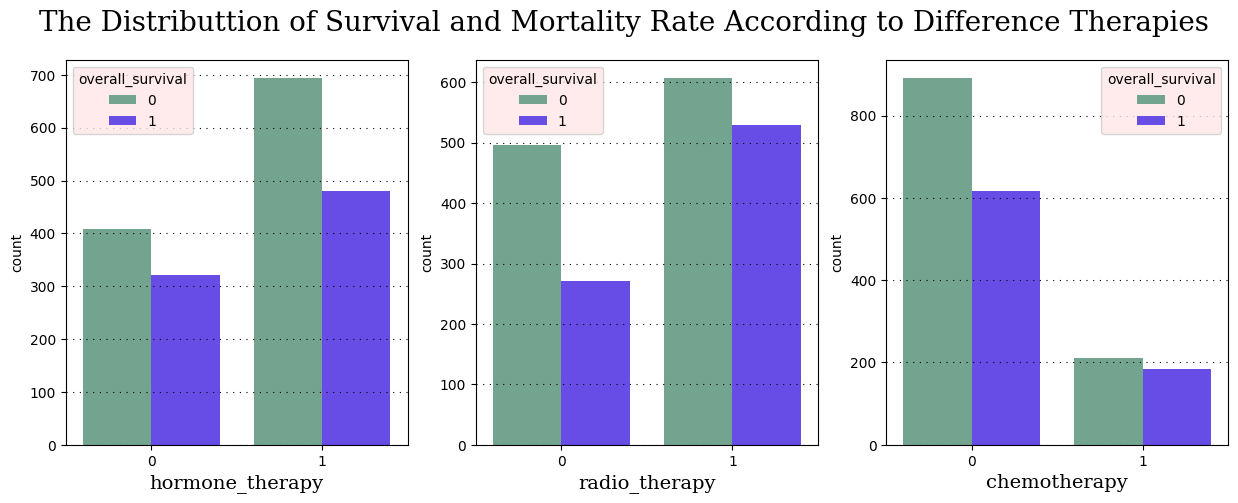

In [35]:
fig = plt.figure(figsize = (15, 5))
background_color = "#FFFFFF"
fig.patch.set_facecolor(background_color)
color_palette = ["#6aac90", "#5833ff"]


columns = ['hormone_therapy', 'radio_therapy', 'chemotherapy']
for a, column in enumerate(columns):
    ax = plt.subplot(1,3, a +1)
    sns.countplot(data = data_attribute,hue = 'overall_survival', x = column , palette = color_palette)
    ax.set_xlabel(column, fontsize=14, fontfamily='serif', color='#000000')
    ax.set_facecolor(background_color)
    ax.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1, 5))

fig.suptitle("The Distributtion of Survival and Mortality Rate According to Difference Therapies ",
            fontsize = 20, fontfamily = "serif", color = '#000000')

Accuracy: 0.7099236641221374

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.78      0.77       162
           1       0.62      0.60      0.61       100

    accuracy                           0.71       262
   macro avg       0.69      0.69      0.69       262
weighted avg       0.71      0.71      0.71       262



/var/folders/gj/7ksb4gv53ml_ryr5sn4vfm1w0000gn/T/ipykernel_2298/3829890963.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_feature_importances, y=top_features, palette="viridis")


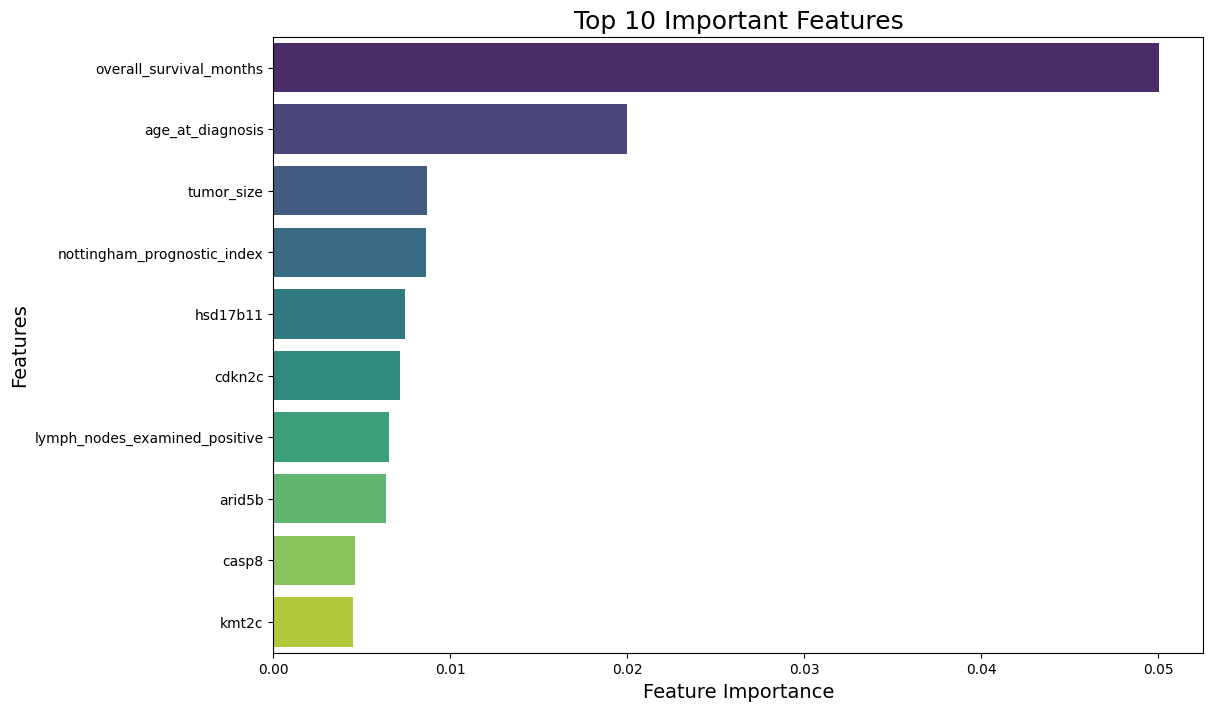

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the background color
background_color = '#FFFFFF'
plt.figure(figsize=(12, 8), facecolor=background_color)

# Splitting the data into train and test sets
X = data_df.drop(['overall_survival'], axis=1)
y = data_df['overall_survival']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature Importance Analysis
feature_importances = rf_classifier.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

# Extracting top 10 important features
top_features = X.columns[sorted_indices][:10]
top_feature_importances = feature_importances[sorted_indices][:10]

# Visualizing Feature Importance with matching bar background color
sns.barplot(x=top_feature_importances, y=top_features, palette="viridis")
plt.xlabel('Feature Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Top 10 Important Features', fontsize=18)
plt.gca().set_facecolor(background_color)
plt.show()
